In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set()

#Persiapan supaya ketika tampil kolom lebar dan nyaman di pandang
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

# PISA 2012

In [5]:
dfpisa12 = pd.read_csv('D:\\pisa2012.csv', encoding='latin-1', low_memory = False)

In [6]:
dfpisa12.head(3)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,...,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUDREL,ANCSUBNORM,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1MACC,PV2MACC,PV3MACC,PV4MACC,PV5MACC,PV1MACQ,PV2MACQ,PV3MACQ,PV4MACQ,PV5MACQ,PV1MACS,PV2MACS,PV3MACS,PV4MACS,PV5MACS,PV1MACU,PV2MACU,PV3MACU,PV4MACU,PV5MACU,PV1MAPE,PV2MAPE,PV3MAPE,PV4MAPE,PV5MAPE,PV1MAPF,PV2MAPF,PV3MAPF,PV4MAPF,PV5MAPF,PV1MAPI,PV2MAPI,PV3MAPI,PV4MAPI,PV5MAPI,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT,W_FSTR1,W_FSTR2,W_FSTR3,W_FSTR4,W_FSTR5,W_FSTR6,W_FSTR7,W_FSTR8,W_FSTR9,W_FSTR10,W_FSTR11,W_FSTR12,W_FSTR13,W_FSTR14,W_FSTR15,W_FSTR16,W_FSTR17,W_FSTR18,W_FSTR19,W_FSTR20,W_FSTR21,W_FSTR22,W_FSTR23,W_FSTR24,W_FSTR25,W_FSTR26,W_FSTR27,W_FSTR28,W_FSTR29,W_FSTR30,W_FSTR31,W_FSTR32,W_FSTR33,W_FSTR34,W_FSTR35,W_FSTR36,W_FSTR37,W_FSTR38,W_FSTR39,W_FSTR40,W_FSTR41,W_FSTR42,W_FSTR43,W_FSTR44,W_FSTR45,W_FSTR46,W_FSTR47,W_FSTR48,W_FSTR49,W_FSTR50,W_FSTR51,W_FSTR52,W_FSTR53,W_FSTR54,W_FSTR55,W_FSTR56,W_FSTR57,W_FSTR58,W_FSTR59,W_FSTR60,W_FSTR61,W_FSTR62,W_FSTR63,W_FSTR64,W_FSTR65,W_FSTR66,W_FSTR67,W_FSTR68,W_FSTR69,W_FSTR70,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,1996,Female,No,6.0,"No, never","No, never","No, never",None,None,1.0,Yes,Yes,Yes,Yes,NaN,NaN,<ISCED level 3A>,No,No,No,No,"Other (e.g. home duties, retired)",<ISCED level 3A>,NaN,NaN,NaN,NaN,Working part-time <for pay>,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,No,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No,Yes,8002,8001,8002,Two,One,None,None,None,0-10 books,Agree,Strongly agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Disagree,Agree,Disagree,Agree,Agree,Agree,Not at all confident,Not very confident,Confident,Confident,Confident,Not at all confident,Confident,Very confident,Agree,Disagree,Agree,Agree,Agree,Agree,Agree,Dis

In [21]:
dfpisa12_col_fix = dfpisa12[['CNT', 'ST03Q02', 'AGE', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F', 'COBN_M', 'COBN_S']]

In [22]:
dfpisa12_col_fix.head()

,CNT,ST03Q02,AGE,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,COBN_F,COBN_M,COBN_S
0,Albania,1996,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,Albania,Albania,Albania
1,Albania,1996,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,Albania,Albania,Albania
2,Albania,1996,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,Albania,Albania,Albania
3,Albania,1996,15.67,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,Albania,Albania,Albania
4,Albania,1996,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,Albania,Albania,Albania


In [23]:
dfpisa12_col_fix.loc[np.isfinite(dfpisa12_col_fix['AGE']) == False, 'AGE'] = dfpisa12_col_fix['AGE'].mean()

In [24]:
dfpisa12_col_fix.loc[dfpisa12_col_fix['COBN_F'].isna() == True, 'COBN_F'] = 'Missing'
dfpisa12_col_fix.loc[dfpisa12_col_fix['COBN_M'].isna() == True, 'COBN_M'] = 'Missing'
dfpisa12_col_fix.loc[dfpisa12_col_fix['COBN_S'].isna() == True, 'COBN_S'] = 'Missing'

dfpisa12_col_fix.loc[dfpisa12_col_fix['COBN_F'] == 'Invalid', 'COBN_F'] = 'Missing'
dfpisa12_col_fix.loc[dfpisa12_col_fix['COBN_M'] == 'Invalid', 'COBN_M'] = 'Missing'
dfpisa12_col_fix.loc[dfpisa12_col_fix['COBN_S'] == 'Invalid', 'COBN_S'] = 'Missing'

In [25]:
for column in dfpisa12_col_fix.columns:
    if (dfpisa12_col_fix[column].isna().sum() > 0):
        print((column) + '  ' + str(dfpisa12_col_fix[column].isna().sum()))

In [26]:
dfpisa12_col_fix['Nilai Matematika'] = (dfpisa12_col_fix['PV1MATH'] + dfpisa12_col_fix['PV2MATH'] + dfpisa12_col_fix['PV3MATH'] + dfpisa12_col_fix['PV4MATH'] + dfpisa12_col_fix['PV5MATH']) / 5
dfpisa12_col_fix['Nilai Membaca'] = (dfpisa12_col_fix['PV1READ'] + dfpisa12_col_fix['PV2READ'] + dfpisa12_col_fix['PV3READ'] + dfpisa12_col_fix['PV4READ'] + dfpisa12_col_fix['PV5READ']) / 5
dfpisa12_col_fix['Nilai Sains'] = (dfpisa12_col_fix['PV1SCIE'] + dfpisa12_col_fix['PV2SCIE'] + dfpisa12_col_fix['PV3SCIE'] + dfpisa12_col_fix['PV4SCIE'] + dfpisa12_col_fix['PV5SCIE']) / 5

C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\723417052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpisa12_col_fix['Nilai Matematika'] = (dfpisa12_col_fix['PV1MATH'] + dfpisa12_col_fix['PV2MATH'] + dfpisa12_col_fix['PV3MATH'] + dfpisa12_col_fix['PV4MATH'] + dfpisa12_col_fix['PV5MATH']) / 5
C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\723417052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpisa12_col_fix['Nilai Membaca'] = (dfpisa12_col_fix['PV1READ'] + dfpisa12_col_f

In [27]:
dfpisa12_col_fix.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                   'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\2043800440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpisa12_col_fix.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',


In [28]:
dfpisa12_col_fix.rename({'CNT' : 'Negara', 'ST03Q02' : 'Tahun Lahir', 'ST04Q01' : 'Jenis Kelamin', 'AGE' : 'Umur', 'COBN_F' : 'Tempat Lahir Ayah', 
           'COBN_M' : 'Tempat Lahir Ibu', 'COBN_S' : 'Tempat Lahir'}, axis = 'columns', inplace = True)

C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\4081962147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpisa12_col_fix.rename({'CNT' : 'Negara', 'ST03Q02' : 'Tahun Lahir', 'ST04Q01' : 'Jenis Kelamin', 'AGE' : 'Umur', 'COBN_F' : 'Tempat Lahir Ayah',


,Negara,Tahun Lahir,Umur,Tempat Lahir,Nilai Matematika,Nilai Membaca,Nilai Sains,Punya Orang tua Latar Belakang yang Sama
0,Albania,1996,16.17,Albania,366.18634,261.01424,371.91348,True
1,Albania,1996,16.17,Albania,470.56396,384.68832,478.12382,True
2,Albania,1996,15.58,Albania,505.53824,405.18154,486.60946,True
3,Albania,1996,15.67,Albania,449.45476,477.46376,453.97240,True
4,Albania,1996,15.50,Albania,385.50398,256.01010,367.15778,True


In [29]:
#Mengidentifikasi Latar Belakang orantua yang sama
dfpisa12_col_fix['Punya Orang tua Latar Belakang yang Sama'] = (dfpisa12_col_fix['Tempat Lahir Ibu'] == dfpisa12_col_fix['Tempat Lahir Ayah'])
dfpisa12_col_fix.drop(columns = ['Tempat Lahir Ibu', 'Tempat Lahir Ayah'], inplace = True)

C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\1030060689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpisa12_col_fix['Punya Orang tua Latar Belakang yang Sama'] = (dfpisa12_col_fix['Tempat Lahir Ibu'] == dfpisa12_col_fix['Tempat Lahir Ayah'])
C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\1030060689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpisa12_col_fix.drop(columns = ['Tempat Lahir Ibu', 'Tempat Lahir Ayah'], inplace = True)


In [30]:
dfpisa12_col_fix.iloc[100:500]

,Negara,Tahun Lahir,Umur,Tempat Lahir,Nilai Matematika,Nilai Membaca,Nilai Sains,Punya Orang tua Latar Belakang yang Sama
100,Albania,1996,15.58,Albania,443.84640,398.35046,425.06528,True
101,Albania,1996,16.00,Albania,498.68360,519.95934,513.37188,True
102,Albania,1996,15.33,Albania,493.46472,484.27638,477.75082,True
103,Albania,1996,16.17,Albania,352.39914,363.63912,349.06752,True
104,Albania,1996,15.42,Albania,366.10842,327.02142,294.88998,True
105,Albania,1996,15.67,Albania,504.99300,441.08436,489.31370,True
106,Albania,1996,15.67,Albania,507.09612,429.02234,523.44274,True
107,Albania,1996,15.42,Albania,312.59542,332.14740,331.63000,True
108,Albania,1996,16.17,Albania,407.08056,508.36244,400.72734,True
109,Albania,1996,15.33,Albania,187.49804,160.29056,193.71504,True


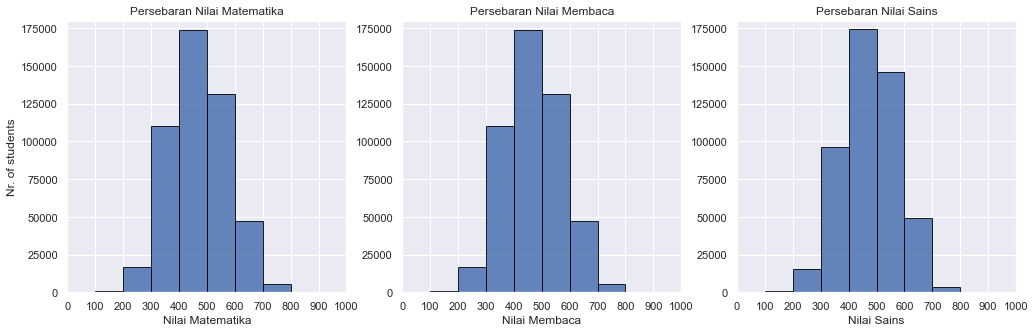

In [31]:
plt.figure(figsize = [17, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(dfpisa12_col_fix['Nilai Matematika'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Nilai Matematika');
plt.ylabel('Nr. of students')
plt.title("Persebaran Nilai Matematika");

plt.subplot(1, 3, 2)
plt.hist(dfpisa12_col_fix['Nilai Matematika'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Nilai Membaca');
plt.title("Persebaran Nilai Membaca");

plt.subplot(1, 3, 3)
plt.hist(dfpisa12_col_fix['Nilai Sains'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Nilai Sains');
plt.title("Persebaran Nilai Sains");

In [32]:
nilai_matematika_tertinggi = dfpisa12_col_fix[dfpisa12_col_fix['Nilai Matematika'] > 800]['Negara'].value_counts()
nilai_membaca_tertinggi = dfpisa12_col_fix[dfpisa12_col_fix['Nilai Membaca'] > 800]['Negara'].value_counts()
nilai_sains_tertinggi = dfpisa12_col_fix[dfpisa12_col_fix['Nilai Sains'] > 800]['Negara'].value_counts()

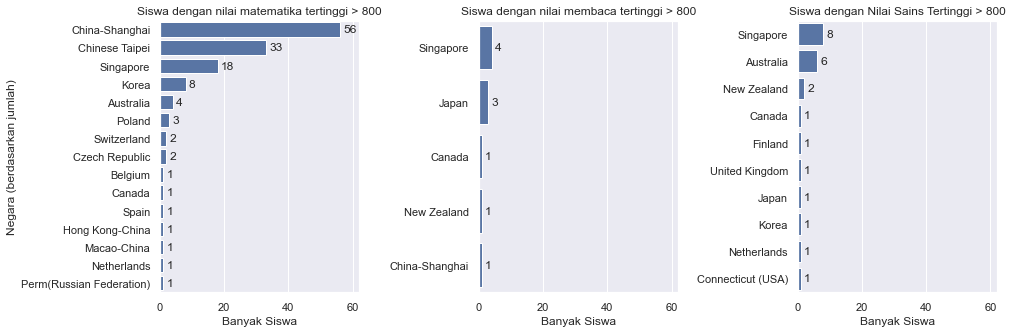

In [33]:
plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace = 0.6) # adjust spacing between subplots, in order to show long country names nicely
x_lim_max = nilai_matematika_tertinggi.values[0] + 6 # '+6' is done in order to show the text counts properly next to the bars


plt.subplot(1, 3, 1)
sb.barplot(y = nilai_matematika_tertinggi.index, x = nilai_matematika_tertinggi.values, color = sb.color_palette()[0])
plt.title('Siswa dengan nilai matematika tertinggi > 800');
plt.xlabel('Banyak Siswa')
plt.ylabel('Negara (berdasarkan jumlah)')

# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = nilai_matematika_tertinggi[label.get_text()] + 1, s = nilai_matematika_tertinggi[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);    


plt.subplot(1, 3, 2)
sb.barplot(y = nilai_membaca_tertinggi.index, x = nilai_membaca_tertinggi.values, color = sb.color_palette()[0])
plt.xlim(0, x_lim_max);
plt.title('Siswa dengan nilai membaca tertinggi > 800');
plt.xlabel('Banyak Siswa')

# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = nilai_membaca_tertinggi[label.get_text()] + 1, s = nilai_membaca_tertinggi[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);    


plt.subplot(1, 3, 3)
sb.barplot(y = nilai_sains_tertinggi.index, x = nilai_sains_tertinggi.values, color = sb.color_palette()[0])
plt.xlim(0, x_lim_max);
plt.title('Siswa dengan Nilai Sains Tertinggi > 800');
plt.xlabel('Banyak Siswa')

# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = nilai_sains_tertinggi[label.get_text()] + 1, s = nilai_sains_tertinggi[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);

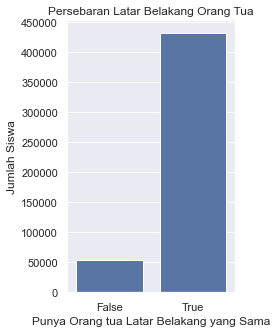

In [34]:
plt.figure(figsize=[3, 5]);
sb.countplot(x = 'Punya Orang tua Latar Belakang yang Sama', data = dfpisa12_col_fix, color = sb.color_palette()[0]);

y_ticks = np.arange(0, 450000 + 1, 50000)
plt.yticks(y_ticks, y_ticks);
plt.ylabel("Jumlah Siswa");
plt.title('Persebaran Latar Belakang Orang Tua');

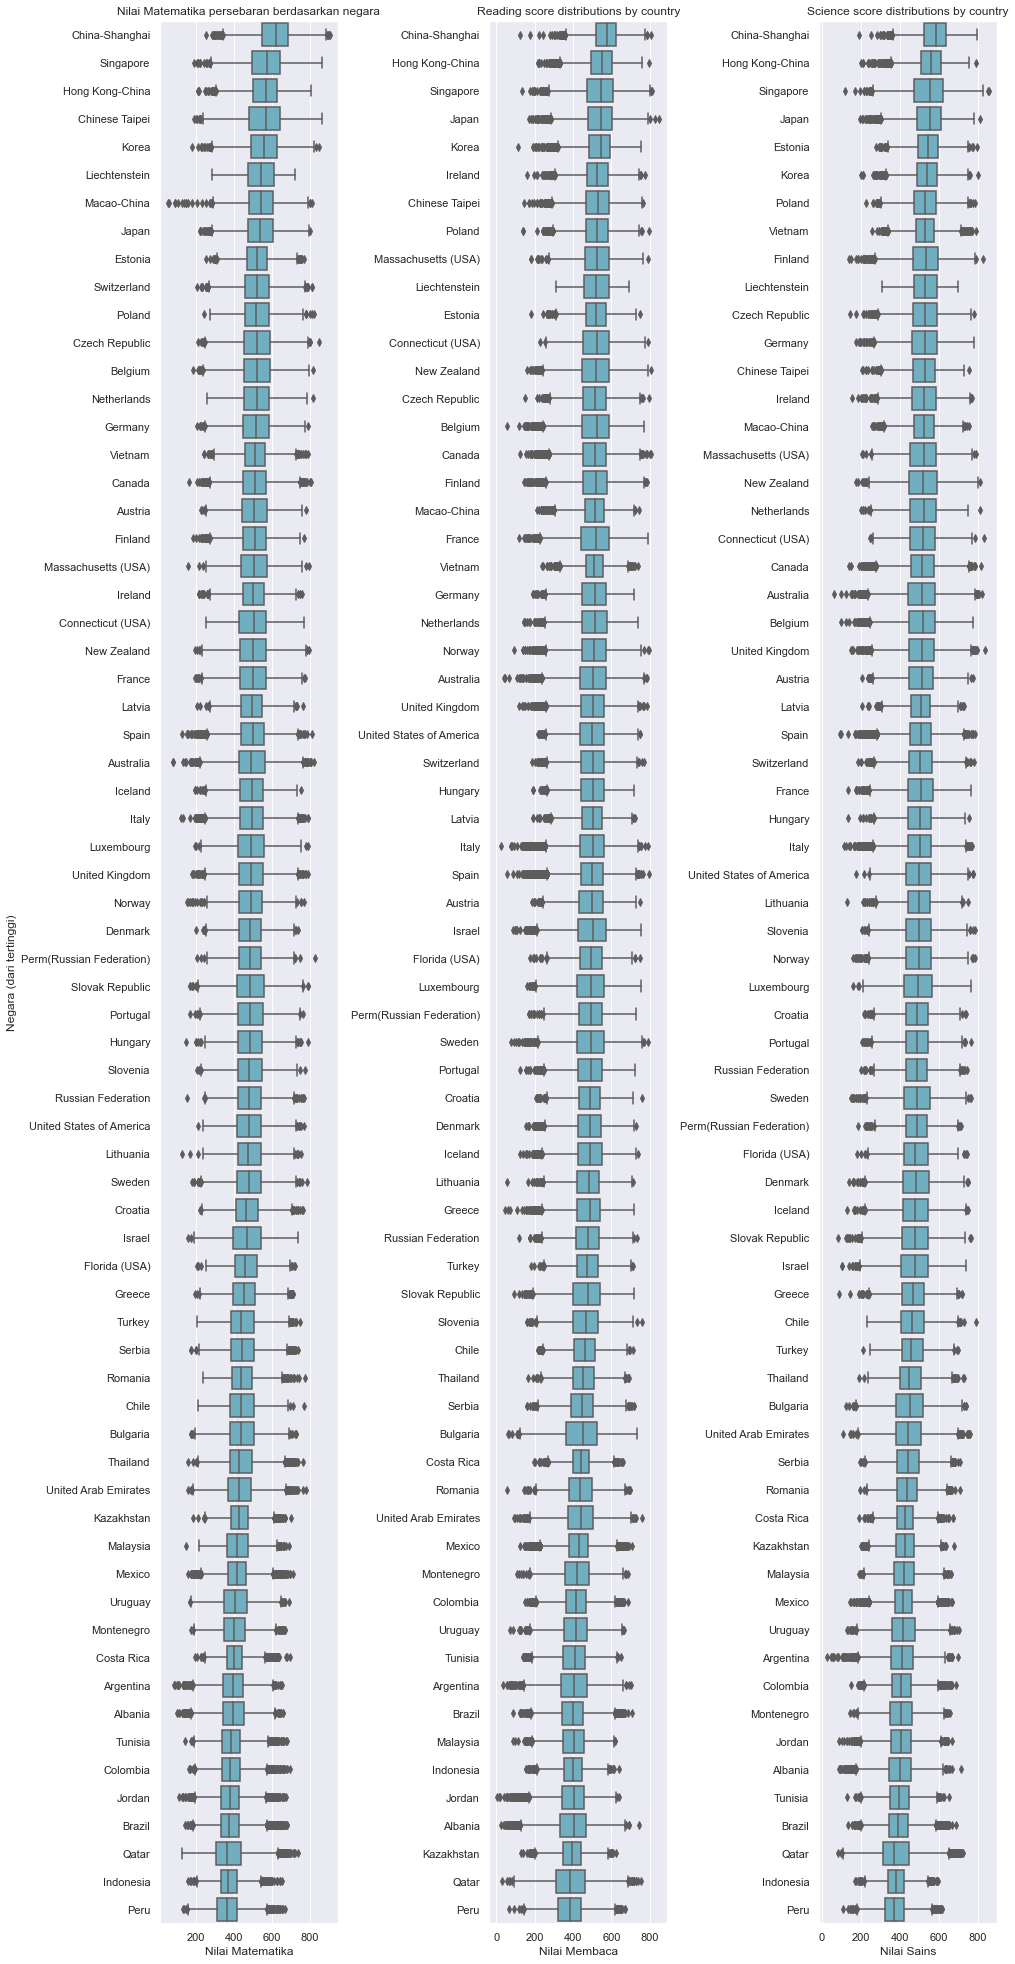

In [35]:
plt.figure(figsize = [15, 35])
plt.subplots_adjust(wspace = 0.85) # adjust spacing between subplots, in order to show long country names nicely

urutan_matematika_dari_negara = dfpisa12_col_fix.groupby('Negara')['Nilai Matematika'].mean().sort_values(ascending = False).index
urutan_membaca_dari_negara = dfpisa12_col_fix.groupby('Negara')['Nilai Membaca'].mean().sort_values(ascending = False).index
urutan_sains_dari_negara = dfpisa12_col_fix.groupby('Negara')['Nilai Sains'].mean().sort_values(ascending = False).index

plt.subplot(1, 3, 1)
sb.boxplot(x = dfpisa12_col_fix['Nilai Matematika'], y = dfpisa12_col_fix['Negara'], order = urutan_matematika_dari_negara, color = sb.color_palette()[9]);
plt.ylabel('Negara (dari tertinggi)')
plt.title('Nilai Matematika persebaran berdasarkan negara');

plt.subplot(1, 3, 2)
sb.boxplot(x = dfpisa12_col_fix['Nilai Membaca'], y = dfpisa12_col_fix['Negara'], order = urutan_membaca_dari_negara, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Reading score distributions by country');

plt.subplot(1, 3, 3)
sb.boxplot(x = dfpisa12_col_fix['Nilai Sains'], y = dfpisa12_col_fix['Negara'], order =urutan_sains_dari_negara, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Science score distributions by country');

In [36]:
tertinggi_matematika_membaca = dfpisa12_col_fix[(dfpisa12_col_fix['Nilai Matematika'] >= 800) & (dfpisa12_col_fix['Nilai Membaca'] >= 800)]['Negara'].value_counts()
tertinggi_matematika_sains = dfpisa12_col_fix[(dfpisa12_col_fix['Nilai Matematika'] >= 800) & (dfpisa12_col_fix['Nilai Membaca'] >= 800)]['Negara'].value_counts()
tertinggi_sains_membaca = dfpisa12_col_fix[(dfpisa12_col_fix['Nilai Membaca'] >= 800) & (dfpisa12_col_fix['Nilai Membaca'] >= 800)]['Negara'].value_counts()

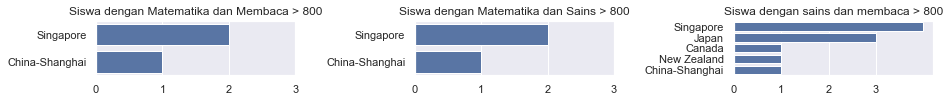

In [37]:
plt.figure(figsize = [15, 1])
plt.subplots_adjust(wspace = 0.6) # adjust spacing between subplots, in order to show long country names nicely
x_lim_max = tertinggi_matematika_sains.values[0] # adjust the proportions of the x-axis with respect to all 3 plots using this

plt.subplot(1, 3, 1)
sb.barplot(y = tertinggi_matematika_membaca.index, x = tertinggi_matematika_membaca.values, color = sb.color_palette()[0])
plt.title('Siswa dengan Matematika dan Membaca > 800');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 3, 2)
sb.barplot(y = tertinggi_matematika_sains.index, x = tertinggi_matematika_sains.values, color = sb.color_palette()[0])
plt.title('Siswa dengan Matematika dan Sains > 800');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 3, 3)
sb.barplot(y = tertinggi_sains_membaca.index, x = tertinggi_sains_membaca.values, color = sb.color_palette()[0])
plt.title('Siswa dengan sains dan membaca > 800');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

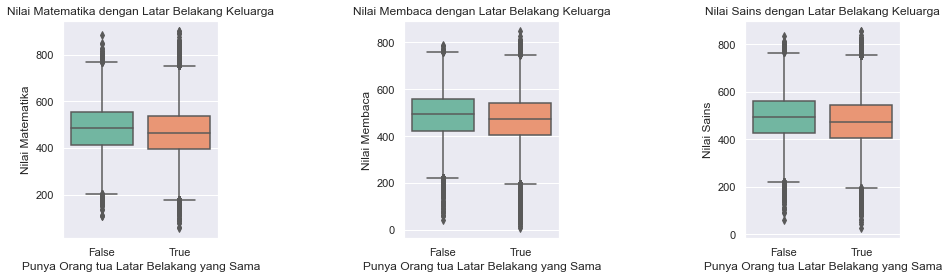

In [39]:
plt.figure(figsize = [15, 4])
plt.subplots_adjust(wspace = 1.2)

plt.subplot(1, 3, 1)
sb.boxplot(x = dfpisa12_col_fix['Punya Orang tua Latar Belakang yang Sama'], y = dfpisa12_col_fix['Nilai Matematika'], palette = 'Set2')
plt.title('Nilai Matematika dengan Latar Belakang Keluarga');

plt.subplot(1, 3, 2)
sb.boxplot(x = dfpisa12_col_fix['Punya Orang tua Latar Belakang yang Sama'], y = dfpisa12_col_fix['Nilai Membaca'], palette = 'Set2')
plt.title('Nilai Membaca dengan Latar Belakang Keluarga');

plt.subplot(1, 3, 3)
sb.boxplot(x = dfpisa12_col_fix['Punya Orang tua Latar Belakang yang Sama'], y = dfpisa12_col_fix['Nilai Sains'], palette = 'Set2');
plt.title('Nilai Sains dengan Latar Belakang Keluarga');

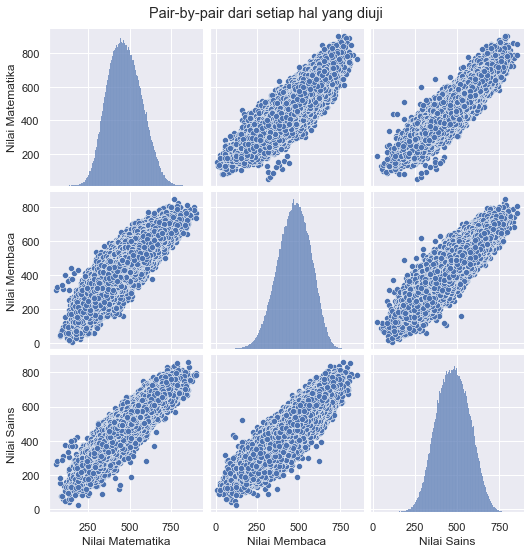

In [40]:
grid = sb.pairplot(data = dfpisa12_col_fix, vars=["Nilai Matematika", "Nilai Membaca", "Nilai Sains"]);
grid.fig.suptitle("Pair-by-pair dari setiap hal yang diuji", y = 1.02);

In [42]:
country_outliers = []

for negara in dfpisa12_col_fix['Negara'].unique():
    if ((np.abs((urutan_matematika_dari_negara.get_loc(negara) - urutan_membaca_dari_negara.get_loc(negara))) > 10) |\
        (np.abs((urutan_matematika_dari_negara.get_loc(negara) - urutan_sains_dari_negara.get_loc(negara))) > 10) |\
        (np.abs((urutan_membaca_dari_negara.get_loc(negara) - urutan_sains_dari_negara.get_loc(negara))) > 10)):
        
        country_outliers.append(negara)
        
        
country_outliers.sort() # Sort countries alphabetically

for country in country_outliers:
    print((country) + ':' + str((len('United States of America:') - len(country) + 1) * ' ') + 'Math place: ' + str(urutan_matematika_dari_negara.get_loc(country)) + str((5 - len(str(urutan_matematika_dari_negara.get_loc(country))) + 1) * ' ') + 'Reading place: ' + str(urutan_membaca_dari_negara.get_loc(country)) + str((5 - len(str(urutan_membaca_dari_negara.get_loc(country))) + 1) * ' ') + 'Science place: ' + str(urutan_sains_dari_negara.get_loc(country)))

Austria:                   Math place: 17    Reading place: 31    Science place: 23
Florida (USA):             Math place: 44    Reading place: 33    Science place: 40
Iceland:                   Math place: 27    Reading place: 40    Science place: 42
Ireland:                   Math place: 20    Reading place: 5     Science place: 13
Israel:                    Math place: 43    Reading place: 32    Science place: 44
Kazakhstan:                Math place: 53    Reading place: 65    Science place: 54
Macao-China:               Math place: 6     Reading place: 17    Science place: 14
Massachusetts (USA):       Math place: 19    Reading place: 8     Science place: 15
Norway:                    Math place: 31    Reading place: 22    Science place: 33
Slovak Republic:           Math place: 34    Reading place: 45    Science place: 43
Slovenia:                  Math place: 37    Reading place: 46    Science place: 32
Switzerland:               Math place: 9     Reading place: 26    Science pl

In [83]:
dfpisa12_col_fix2 = dfpisa12_col_fix.groupby(['Negara'])['Negara','Nilai Matematika','Nilai Membaca','Nilai Sains','Umur', inplace = True].mean()

SyntaxError: invalid syntax (4020421624.py, line 1)

In [82]:
dfpisa12_col_fix2

,Nilai Matematika,Nilai Membaca,Nilai Sains,Umur
Negara,,,,
Albania,394.878912,396.250245,398.916529,15.811387
Argentina,395.635711,403.596060,410.478404,15.685027
Australia,493.268939,501.056931,511.638212,15.783324
Austria,507.778785,491.485551,508.036810,15.803674
Belgium,519.668410,512.281728,510.302595,15.840747
Brazil,382.547146,400.421704,395.513221,15.870810
Bulgaria,442.469966,442.034546,451.088994,15.804193
Canada,509.417687,510.957748,514.456633,15.838933
Chile,444.692318,460.316509,464.723796,15.799196


In [77]:
dfpisa12_col_fix2.to_excel(r'D:\Data\Project Data Science\export_dataframe12grpbycntry2.xlsx', sheet_name='2012', index = False)

PermissionError: [Errno 13] Permission denied: 'D:\\Data\\Project Data Science\\export_dataframe12grpbycntry2.xlsx'

# PISA 2018

In [1]:
pip install pyreadstat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
import pyreadstat


In [49]:
df18_pure, meta = pyreadstat.read_sas7bdat('D:\\PISA\\cy07_msu_stu_qqq.sas7bdat')

In [54]:
df18_pure.head()

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,LANGTEST_QQQ,LANGTEST_COG,LANGTEST_PAQ,BOOKID,ST001D01T,ST003D02T,ST003D03T,ST004D01T,ST005Q01TA,ST006Q01TA,ST006Q02TA,ST006Q03TA,ST006Q04TA,ST007Q01TA,ST008Q01TA,ST008Q02TA,ST008Q03TA,ST008Q04TA,ST011Q01TA,ST011Q02TA,ST011Q03TA,ST011Q04TA,ST011Q05TA,ST011Q06TA,ST011Q07TA,ST011Q08TA,ST011Q09TA,ST011Q10TA,ST011Q11TA,ST011Q12TA,ST011Q16NA,ST011D17TA,ST011D18TA,ST011D19TA,ST012Q01TA,ST012Q02TA,ST012Q03TA,ST012Q05NA,ST012Q06NA,ST012Q07NA,ST012Q08NA,ST012Q09NA,ST013Q01TA,ST019AQ01T,ST019BQ01T,ST019CQ01T,ST021Q01TA,ST125Q01NA,ST126Q01TA,ST127Q01TA,ST127Q02TA,ST127Q03TA,ST022Q01TA,ST023Q01TA,ST023Q02TA,ST023Q03TA,ST023Q04TA,ST023Q05TA,ST097Q01TA,ST097Q02TA,ST097Q03TA,ST097Q04TA,ST097Q05TA,ST100Q01TA,ST100Q02TA,ST100Q03TA,ST100Q04TA,ST102Q01TA,ST102Q02TA,ST102Q03TA,ST102Q04TA,ST211Q01HA,ST211Q02HA,ST211Q03HA,ST212Q01HA,ST212Q02HA,ST212Q03HA,ST104Q02NA,ST104Q03NA,ST104Q04NA,ST213Q01HA,ST213Q02HA,ST213Q03HA,ST213Q04HA,ST150Q01IA,ST150Q02IA,ST150Q03IA,ST150Q04HA,ST152Q05IA,ST152Q06IA,ST152Q07IA,ST152Q08IA,ST154Q01HA,ST153Q01HA,ST153Q02HA,ST153Q03HA,ST153Q04HA,ST153Q05HA,ST153Q06HA,ST153Q08HA,ST153Q09HA,ST153Q10HA,ST158Q01HA,ST158Q02HA,ST158Q03HA,ST158Q04HA,ST158Q05HA,ST158Q06HA,ST158Q07HA,ST160Q01IA,ST160Q02IA,ST160Q03IA,ST160Q04IA,ST160Q05IA,ST167Q01IA,ST167Q02IA,ST167Q03IA,ST167Q04IA,ST167Q05IA,ST168Q01HA,ST175Q01IA,ST176Q01IA,ST176Q02IA,ST176Q03IA,ST176Q05IA,ST176Q06IA,ST176Q07IA,ST161Q01HA,ST161Q02HA,ST161Q03HA,ST161Q06HA,ST161Q07HA,ST161Q08HA,ST163Q02HA,ST163Q03HA,ST163Q04HA,ST164Q01IA,ST164Q02IA,ST164Q03IA,ST164Q04IA,ST164Q05IA,ST164Q06IA,ST165Q01IA,ST165Q02IA,ST165Q03IA,ST165Q04IA,ST165Q05IA,ST166Q01HA,ST166Q02HA,ST166Q03HA,ST166Q04HA,ST166Q05HA,ST016Q01NA,ST036Q05TA,ST036Q06TA,ST036Q08TA,ST225Q01HA,ST225Q02HA,ST225Q03HA,ST225Q04HA,ST225Q05HA,ST225Q06HA,ST181Q02HA,ST181Q03HA,ST181Q04HA,ST182Q03HA,ST182Q04HA,ST182Q05HA,ST182Q06HA,ST183Q01HA,ST183Q02HA,ST183Q03HA,ST184Q01HA,ST185Q01HA,ST185Q02HA,ST185Q03HA,ST186Q05HA,ST186Q06HA,ST186Q07HA,ST186Q10HA,ST186Q09HA,ST186Q02HA,ST186Q01HA,ST186Q08HA,ST186Q03HA,ST208Q01HA,ST208Q02HA,ST208Q04HA,ST188Q01HA,ST188Q02HA,...,INTICT,COMPICT,AUTICT,SOIAICT,ICTCLASS,ICTOUTSIDE,INFOCAR,INFOJOB1,INFOJOB2,FLCONFIN,FLCONICT,FLSCHOOL,FLFAMILY,CURSUPP,EMOSUPP,PQSCHOOL,PASCHPOL,PRESUPP,JOYREADP,ATTIMMP,INTCULTP,GCAWAREP,BODYIMA,SOCONPA,W_FSTUWT,W_FSTURWT1,W_FSTURWT2,W_FSTURWT3,W_FSTURWT4,W_FSTURWT5,W_FSTURWT6,W_FSTURWT7,W_FSTURWT8,W_FSTURWT9,W_FSTURWT10,W_FSTURWT11,W_FSTURWT12,W_FSTURWT13,W_FSTURWT14,W_FSTURWT15,W_FSTURWT16,W_FSTURWT17,W_FSTURWT18,W_FSTURWT19,W_FSTURWT20,W_FSTURWT21,W_FSTURWT22,W_FSTURWT23,W_FSTURWT24,W_FSTURWT25,W_FSTURWT26,W_FSTURWT27,W_FSTURWT28,W_FSTURWT29,W_FSTURWT30,W_FSTURWT31,W_FSTURWT32,W_FSTURWT33,W_FSTURWT34,W_FSTURWT35,W_FSTURWT36,W_FSTURWT37,W_FSTURWT38,W_FSTURWT39,W_FSTURWT40,W_FSTURWT41,W_FSTURWT42,W_FSTURWT43,W_FSTURWT44,W_FSTURWT45,W_FSTURWT46,W_FSTURWT47,W_FSTURWT48,W_FSTURWT49,W_FSTURWT50,W_FSTURWT51,W_FSTURWT52,W_FSTURWT53,W_FSTURWT54,W_FSTURWT55,W_FSTURWT56,W_FSTURWT57,W_FSTURWT58,W_FSTURWT59,W_FSTURWT60,W_FSTURWT61,W_FSTURWT62,W_FSTURWT63,W_FSTURWT64,W_FSTURWT65,W_FSTURWT66,W_FSTURWT67,W_FSTURWT68,W_FSTURWT69,W_FSTURWT70,W_FSTURWT71,W_FSTURWT72,W_FSTURWT73,W_FSTURWT74,W_FSTURWT75,W_FSTURWT76,W_FSTURWT77,W_FSTURWT78,W_FSTURWT79,W_FSTURWT80,UNIT,WVARSTRR,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV6MATH,PV7MATH,PV8MATH,PV9MATH,PV10MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV6READ,PV7READ,PV8READ,PV9READ,PV10READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE,PV1GLCM,PV2GLCM,PV3GLCM,PV4GLCM,PV5GLCM,PV6GLCM,PV7GLCM,PV8GLCM,PV9GLCM,PV10GLCM,PV1RCLI,PV2RCLI,PV3RCLI,PV4RCLI,PV5RCLI,PV6RCLI,PV7RCLI,PV8RCLI,PV9RCLI,PV10RCLI,PV1RCUN,PV2RCUN,PV3RCUN,PV4RCUN,PV5RCUN,PV6RCUN,PV7RCUN,PV8RCUN,PV9RCUN,PV10RCUN,PV1RCER,PV2RCER,PV3RCER,PV4RCER,PV5RCER,PV6RCER,PV7RCER,PV8RCER,PV9RCER,PV10RCER,PV1RTSN,PV2RTSN,PV3RTSN,PV4RTSN,PV5RTSN,PV6RTSN,PV7RTSN,PV8RTSN,PV9RTSN,PV10RTSN,PV1RTML

In [55]:
df18_pure.iloc[0:,0:1]

,CNTRYID
0,8.0
1,8.0
2,8.0
3,8.0
4,8.0
...,...
611999,983.0
612000,983.0
612001,983.0
612002,983.0


In [87]:
df18 = df18_pure[['CNT', 'ST003D03T', 'AGE', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F', 'COBN_M', 'COBN_S']]

In [88]:
df18.head()

,CNT,ST003D03T,AGE,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,COBN_F,COBN_M,COBN_S
0,ALB,2002.0,15.50,432.285,485.717,474.458,508.786,428.616,341.838,336.436,356.491,403.464,350.935,390.471,363.896,394.451,405.479,309.142,000800,000800,000800
1,ALB,2002.0,15.83,334.361,408.452,336.913,269.404,370.591,346.338,381.188,309.052,319.158,298.756,336.318,331.444,311.961,374.377,300.209,000800,000800,000800
2,ALB,2002.0,16.00,349.201,374.138,345.969,421.809,308.209,259.591,309.026,285.624,316.116,254.106,334.669,326.045,331.331,364.414,285.723,000800,000800,000800
3,ALB,2002.0,16.08,296.848,436.269,291.399,386.106,322.145,337.527,358.791,312.509,379.126,362.931,344.094,371.352,313.157,366.221,377.494,999999,999999,999999
4,ALB,2002.0,16.17,445.703,389.021,360.926,314.762,355.197,449.654,450.183,470.311,476.222,485.931,445.335,466.726,452.740,401.497,481.526,000800,000800,000800


In [89]:
df18.loc[np.isfinite(df18['AGE']) == False, 'AGE'] = df18['AGE'].mean()

In [90]:
df18.loc[df18['COBN_F'].isna() == True, 'COBN_F'] = 'Missing'
df18.loc[df18['COBN_M'].isna() == True, 'COBN_M'] = 'Missing'
df18.loc[df18['COBN_S'].isna() == True, 'COBN_S'] = 'Missing'

df18.loc[df18['COBN_F'] == 'Invalid', 'COBN_F'] = 'Missing'
df18.loc[df18['COBN_M'] == 'Invalid', 'COBN_M'] = 'Missing'
df18.loc[df18['COBN_S'] == 'Invalid', 'COBN_S'] = 'Missing'

In [91]:
for column in df18.columns:
    if (df18[column].isna().sum() > 0):
        print((column) + '  ' + str(df18[column].isna().sum()))

PV1MATH  5377
PV2MATH  5377
PV3MATH  5377
PV4MATH  5377
PV5MATH  5377
PV1READ  5377
PV2READ  5377
PV3READ  5377
PV4READ  5377
PV5READ  5377
PV1SCIE  5377
PV2SCIE  5377
PV3SCIE  5377
PV4SCIE  5377
PV5SCIE  5377


In [92]:
df18['Nilai Matematika'] = (df18['PV1MATH'] + df18['PV2MATH'] + df18['PV3MATH'] + df18['PV4MATH'] + df18['PV5MATH']) / 5
df18['Nilai Membaca'] = (df18['PV1READ'] + df18['PV2READ'] + df18['PV3READ'] + df18['PV4READ'] + df18['PV5READ']) / 5
df18['Nilai Sains'] = (df18['PV1SCIE'] + df18['PV2SCIE'] + df18['PV3SCIE'] + df18['PV4SCIE'] + df18['PV5SCIE']) / 5

C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\480804257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['Nilai Matematika'] = (df18['PV1MATH'] + df18['PV2MATH'] + df18['PV3MATH'] + df18['PV4MATH'] + df18['PV5MATH']) / 5
C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\480804257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['Nilai Membaca'] = (df18['PV1READ'] + df18['PV2READ'] + df18['PV3READ'] + df18['PV4READ'] + df18['PV5READ']) / 5
C:\Users\Atam Rifai S\AppData\Local

In [93]:
df18.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                   'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\1249218346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',


In [94]:
df18.rename({'CNT' : 'Negara', 'ST03Q02' : 'Tahun Lahir', 'ST04Q01' : 'Jenis Kelamin', 'AGE' : 'Umur', 'COBN_F' : 'Tempat Lahir Ayah', 
           'COBN_M' : 'Tempat Lahir Ibu', 'COBN_S' : 'Tempat Lahir'}, axis = 'columns', inplace = True)

C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\1848018504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18.rename({'CNT' : 'Negara', 'ST03Q02' : 'Tahun Lahir', 'ST04Q01' : 'Jenis Kelamin', 'AGE' : 'Umur', 'COBN_F' : 'Tempat Lahir Ayah',


In [95]:
#Mengidentifikasi Latar Belakang orantua yang sama
df18['Punya Orang tua Latar Belakang yang Sama'] = (df18['Tempat Lahir Ibu'] == df18['Tempat Lahir Ayah'])
df18.drop(columns = ['Tempat Lahir Ibu', 'Tempat Lahir Ayah'], inplace = True)

C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\2801980813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['Punya Orang tua Latar Belakang yang Sama'] = (df18['Tempat Lahir Ibu'] == df18['Tempat Lahir Ayah'])
C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_16172\2801980813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18.drop(columns = ['Tempat Lahir Ibu', 'Tempat Lahir Ayah'], inplace = True)


In [110]:
df18.iloc[100:500]

,Negara,ST003D03T,Umur,Tempat Lahir,Nilai Matematika,Nilai Membaca,Nilai Sains,Punya Orang tua Latar Belakang yang Sama
100,ALB,2002.0,15.83,000800,348.4144,352.3778,408.7532,True
101,ALB,2002.0,16.17,000800,503.6994,484.2496,481.7372,True
102,ALB,2002.0,15.50,000800,474.3368,431.7374,479.0086,True
103,ALB,2002.0,15.67,000800,553.3792,537.0876,541.2738,True
104,ALB,2002.0,15.42,000800,432.0284,300.6468,327.8020,True
105,ALB,2002.0,16.08,000800,482.9562,501.6034,533.8098,True
106,ALB,2002.0,15.33,000800,456.0302,477.2972,467.2098,True
107,ALB,2002.0,16.17,000800,514.7372,486.7786,459.3946,True
108,ALB,2002.0,15.67,000800,393.4610,404.0846,416.5946,True
109,ALB,2002.0,16.00,000800,208.2308,285.8512,337.8408,True


In [ ]:
df18

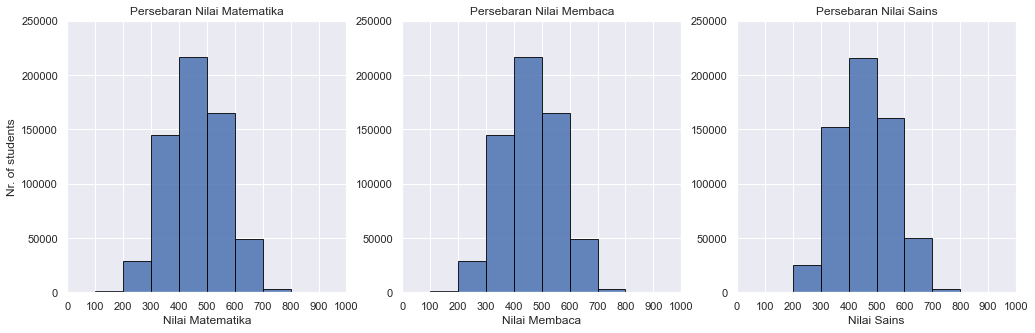

In [97]:
plt.figure(figsize = [17, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(df18['Nilai Matematika'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 250000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Nilai Matematika');
plt.ylabel('Nr. of students')
plt.title("Persebaran Nilai Matematika");

plt.subplot(1, 3, 2)
plt.hist(df18['Nilai Matematika'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 250000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Nilai Membaca');
plt.title("Persebaran Nilai Membaca");

plt.subplot(1, 3, 3)
plt.hist(df18['Nilai Sains'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 250000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Nilai Sains');
plt.title("Persebaran Nilai Sains");

In [98]:
nilai_matematika_tertinggi = df18[df18['Nilai Matematika'] > 700]['Negara'].value_counts()
nilai_membaca_tertinggi = df18[df18['Nilai Membaca'] > 700]['Negara'].value_counts()
nilai_sains_tertinggi = df18[df18['Nilai Sains'] > 700]['Negara'].value_counts()

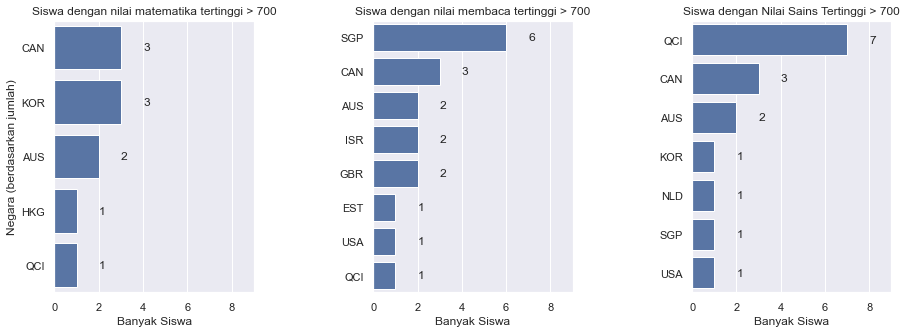

In [100]:
plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace = 0.6) # adjust spacing between subplots, in order to show long country names nicely
x_lim_max = nilai_matematika_tertinggi.values[0] + 6 # '+6' is done in order to show the text counts properly next to the bars


plt.subplot(1, 3, 1)
sb.barplot(y = nilai_matematika_tertinggi.index, x = nilai_matematika_tertinggi.values, color = sb.color_palette()[0])
plt.title('Siswa dengan nilai matematika tertinggi > 700');
plt.xlabel('Banyak Siswa')
plt.ylabel('Negara (berdasarkan jumlah)')

# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = nilai_matematika_tertinggi[label.get_text()] + 1, s = nilai_matematika_tertinggi[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);    


plt.subplot(1, 3, 2)
sb.barplot(y = nilai_membaca_tertinggi.index, x = nilai_membaca_tertinggi.values, color = sb.color_palette()[0])
plt.xlim(0, x_lim_max);
plt.title('Siswa dengan nilai membaca tertinggi > 700');
plt.xlabel('Banyak Siswa')

# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = nilai_membaca_tertinggi[label.get_text()] + 1, s = nilai_membaca_tertinggi[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);    


plt.subplot(1, 3, 3)
sb.barplot(y = nilai_sains_tertinggi.index, x = nilai_sains_tertinggi.values, color = sb.color_palette()[0])
plt.xlim(0, x_lim_max);
plt.title('Siswa dengan Nilai Sains Tertinggi > 700');
plt.xlabel('Banyak Siswa')

# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = nilai_sains_tertinggi[label.get_text()] + 1, s = nilai_sains_tertinggi[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);

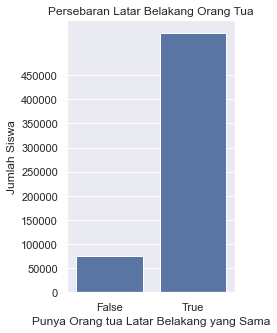

In [101]:
plt.figure(figsize=[3, 5]);
sb.countplot(x = 'Punya Orang tua Latar Belakang yang Sama', data =df18, color = sb.color_palette()[0]);

y_ticks = np.arange(0, 450000 + 1, 50000)
plt.yticks(y_ticks, y_ticks);
plt.ylabel("Jumlah Siswa");
plt.title('Persebaran Latar Belakang Orang Tua');

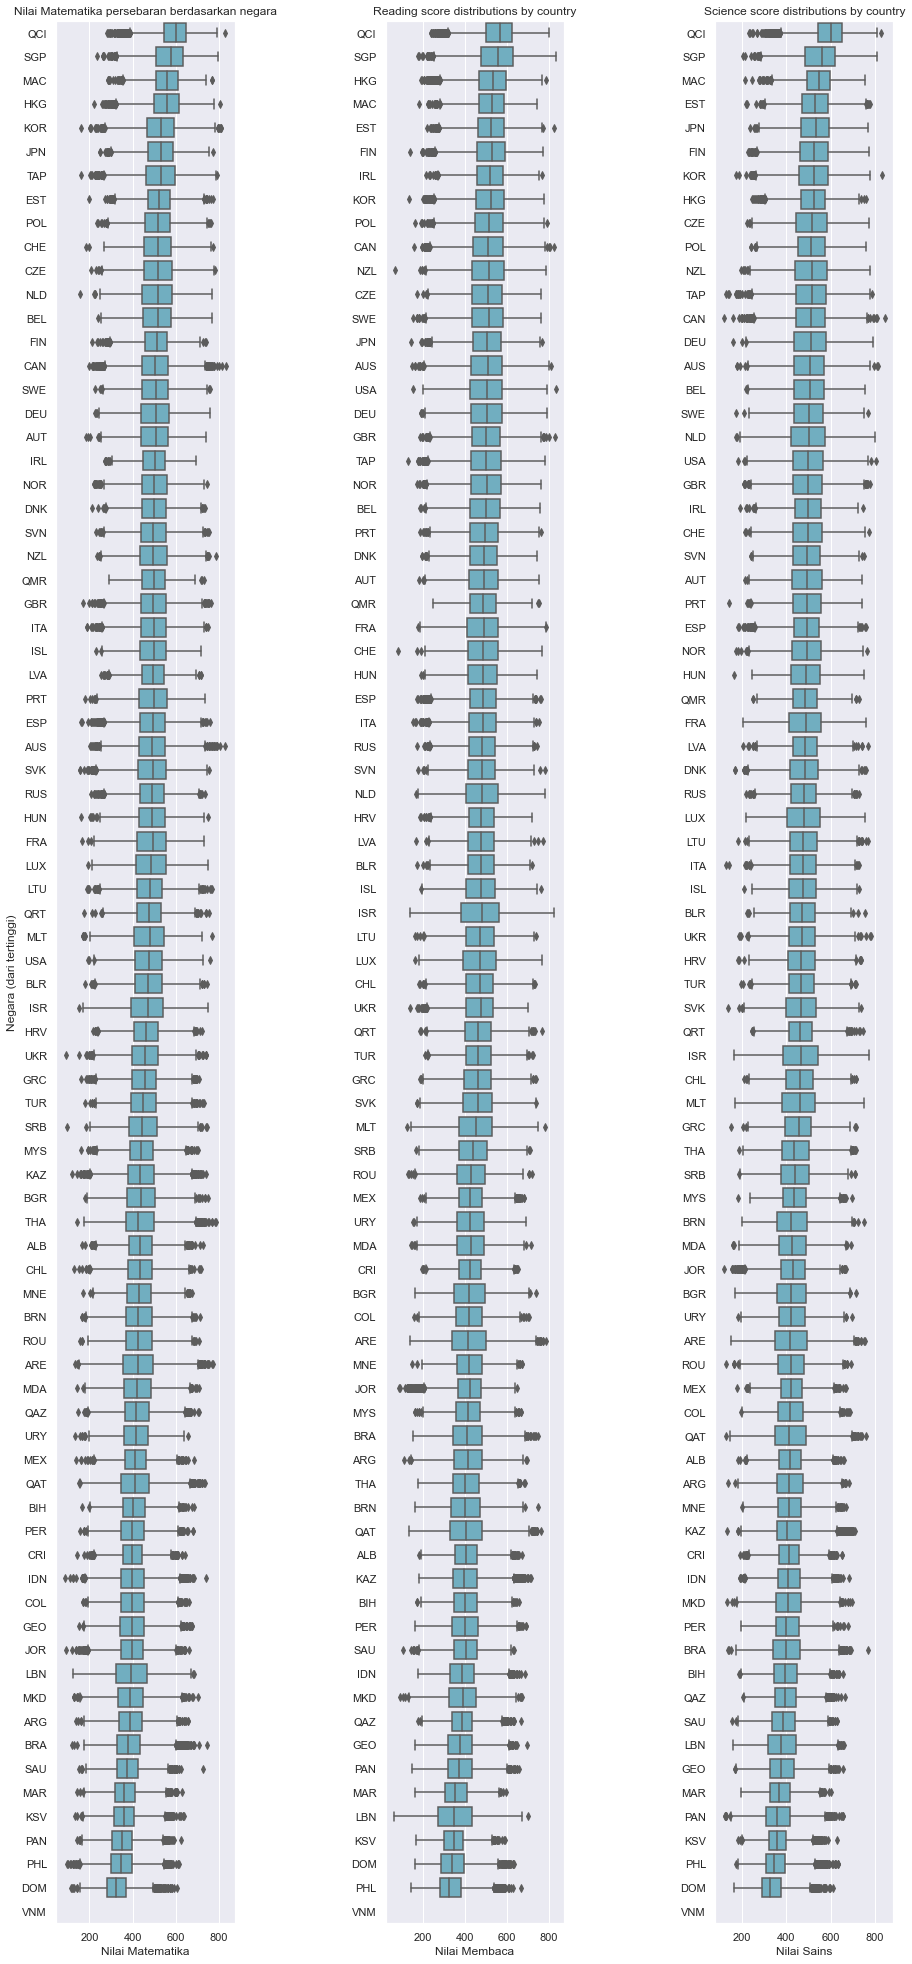

In [102]:
plt.figure(figsize = [15, 35])
plt.subplots_adjust(wspace = 0.85) # adjust spacing between subplots, in order to show long country names nicely

urutan_matematika_dari_negara = df18.groupby('Negara')['Nilai Matematika'].mean().sort_values(ascending = False).index
urutan_membaca_dari_negara = df18.groupby('Negara')['Nilai Membaca'].mean().sort_values(ascending = False).index
urutan_sains_dari_negara = df18.groupby('Negara')['Nilai Sains'].mean().sort_values(ascending = False).index

plt.subplot(1, 3, 1)
sb.boxplot(x = df18['Nilai Matematika'], y = df18['Negara'], order = urutan_matematika_dari_negara, color = sb.color_palette()[9]);
plt.ylabel('Negara (dari tertinggi)')
plt.title('Nilai Matematika persebaran berdasarkan negara');

plt.subplot(1, 3, 2)
sb.boxplot(x = df18['Nilai Membaca'], y = df18['Negara'], order = urutan_membaca_dari_negara, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Reading score distributions by country');

plt.subplot(1, 3, 3)
sb.boxplot(x = df18['Nilai Sains'], y = df18['Negara'], order =urutan_sains_dari_negara, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Science score distributions by country');

In [103]:
tertinggi_matematika_membaca = df18[(df18['Nilai Matematika'] >= 780) & (df18['Nilai Membaca'] >= 780)]['Negara'].value_counts()
tertinggi_matematika_sains = df18[(df18['Nilai Matematika'] >= 780) & (df18['Nilai Membaca'] >= 780)]['Negara'].value_counts()
tertinggi_sains_membaca = df18[(df18['Nilai Membaca'] >= 780) & (df18['Nilai Membaca'] >= 780)]['Negara'].value_counts()

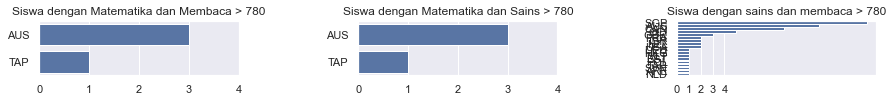

In [104]:
plt.figure(figsize = [15, 1])
plt.subplots_adjust(wspace = 0.6) # adjust spacing between subplots, in order to show long country names nicely
x_lim_max = tertinggi_matematika_sains.values[0] # adjust the proportions of the x-axis with respect to all 3 plots using this

plt.subplot(1, 3, 1)
sb.barplot(y = tertinggi_matematika_membaca.index, x = tertinggi_matematika_membaca.values, color = sb.color_palette()[0])
plt.title('Siswa dengan Matematika dan Membaca > 780');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 3, 2)
sb.barplot(y = tertinggi_matematika_sains.index, x = tertinggi_matematika_sains.values, color = sb.color_palette()[0])
plt.title('Siswa dengan Matematika dan Sains > 780');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 3, 3)
sb.barplot(y = tertinggi_sains_membaca.index, x = tertinggi_sains_membaca.values, color = sb.color_palette()[0])
plt.title('Siswa dengan sains dan membaca > 780');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

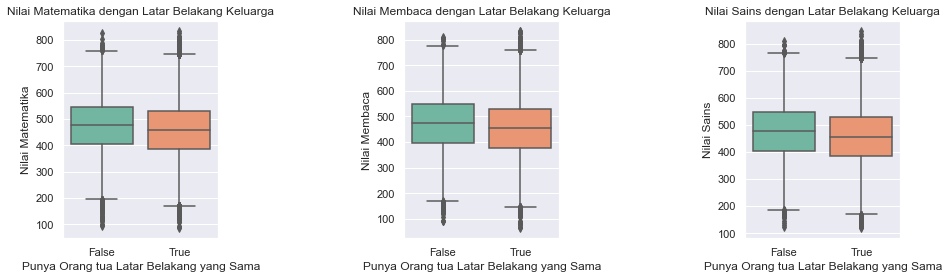

In [105]:
plt.figure(figsize = [15, 4])
plt.subplots_adjust(wspace = 1.2)

plt.subplot(1, 3, 1)
sb.boxplot(x = df18['Punya Orang tua Latar Belakang yang Sama'], y = df18['Nilai Matematika'], palette = 'Set2')
plt.title('Nilai Matematika dengan Latar Belakang Keluarga');

plt.subplot(1, 3, 2)
sb.boxplot(x = df18['Punya Orang tua Latar Belakang yang Sama'], y = df18['Nilai Membaca'], palette = 'Set2')
plt.title('Nilai Membaca dengan Latar Belakang Keluarga');

plt.subplot(1, 3, 3)
sb.boxplot(x = df18['Punya Orang tua Latar Belakang yang Sama'], y = df18['Nilai Sains'], palette = 'Set2');
plt.title('Nilai Sains dengan Latar Belakang Keluarga');

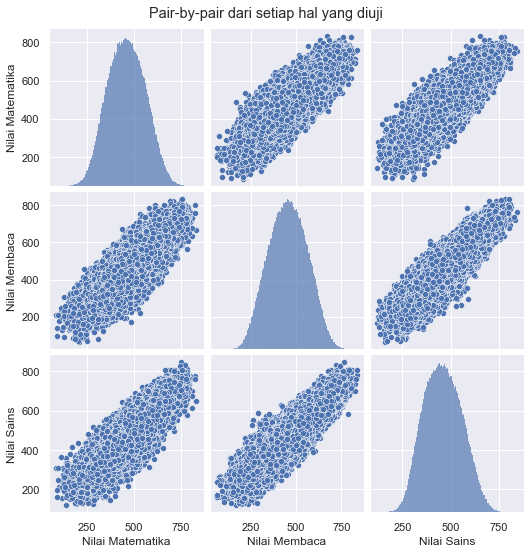

In [106]:
grid = sb.pairplot(data = df18, vars=["Nilai Matematika", "Nilai Membaca", "Nilai Sains"]);
grid.fig.suptitle("Pair-by-pair dari setiap hal yang diuji", y = 1.02);

In [108]:
country_outliers = []

for negara in df18['Negara'].unique():
    if ((np.abs((urutan_matematika_dari_negara.get_loc(negara) - urutan_membaca_dari_negara.get_loc(negara))) > 10) |\
        (np.abs((urutan_matematika_dari_negara.get_loc(negara) - urutan_sains_dari_negara.get_loc(negara))) > 10) |\
        (np.abs((urutan_membaca_dari_negara.get_loc(negara) - urutan_sains_dari_negara.get_loc(negara))) > 10)):
        
        country_outliers.append(negara)
        
        
country_outliers.sort() # Sort countries alphabetically

for country in country_outliers:
    print((country) + ':' + str((len('United States of America:') - len(country) + 1) * ' ') + 'Math place: ' + str(urutan_matematika_dari_negara.get_loc(country)) + str((5 - len(str(urutan_matematika_dari_negara.get_loc(country))) + 1) * ' ') + 'Reading place: ' + str(urutan_membaca_dari_negara.get_loc(country)) + str((5 - len(str(urutan_membaca_dari_negara.get_loc(country))) + 1) * ' ') + 'Science place: ' + str(urutan_sains_dari_negara.get_loc(country)))

ALB:                       Math place: 51    Reading place: 64    Science place: 60
ARG:                       Math place: 71    Reading place: 60    Science place: 61
AUS:                       Math place: 30    Reading place: 14    Science place: 14
BRA:                       Math place: 72    Reading place: 59    Science place: 68
BRN:                       Math place: 54    Reading place: 62    Science place: 50
CHE:                       Math place: 9     Reading place: 26    Science place: 21
CHL:                       Math place: 52    Reading place: 40    Science place: 44
COL:                       Math place: 66    Reading place: 54    Science place: 58
CRI:                       Math place: 64    Reading place: 52    Science place: 64
DNK:                       Math place: 20    Reading place: 22    Science place: 31
IRL:                       Math place: 18    Reading place: 6     Science place: 20
JOR:                       Math place: 68    Reading place: 57    Science pl

In [109]:
df_country_outliers = df18[['Negara', 'Nilai Matematika', 'Nilai Membaca', 'Nilai Sains']][df18['Negara'].isin(country_outliers)]
df_country_outliers = df18.melt('Negara', var_name = 'Score Type', value_name = 'Scores')

In [69]:
plt.figure(figsize = [7, 10])

sb.pointplot(x = 'Scores', y = 'Negara', hue = 'Score Type', data = df_country_outliers, linestyles = '', dodge = 0.4, ci = 'sd', palette = 'deep', order = country_outliers);
plt.legend(loc = 2);
plt.title('Score distribution across subjects of countries with strong deviations in results');


TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 504x720 with 0 Axes>

In [74]:
df18.to_csv (r'D:\Data\Project Data Science\export_dataframe_pisa_2018.csv', index = False, header=True)

In [106]:
df18.iloc[1:100]

,Negara,ST003D03T,Umur,Tempat Lahir,Nilai Matematika,Nilai Membaca,Nilai Sains,Punya Orang tua Latar Belakang yang Sama
1,ALB,2002.0,15.83,000800,343.9442,330.8984,330.8618,True
2,ALB,2002.0,16.00,000800,359.8652,284.8926,328.4364,True
3,ALB,2002.0,16.08,999999,346.5534,350.1768,354.4636,True
4,ALB,2002.0,16.17,000800,373.1218,466.4602,449.5648,True
5,ALB,2002.0,16.08,000800,365.1770,380.0236,384.2844,True
6,ALB,2002.0,15.50,000800,425.3438,337.5204,378.2948,True
7,ALB,2002.0,15.58,900800,477.7424,486.7152,488.1478,True
8,ALB,2002.0,15.33,000800,462.4006,442.7256,422.5222,True
9,ALB,2002.0,16.25,900800,446.2612,386.7112,394.8610,True
10,ALB,2002.0,15.33,000800,409.9924,345.7720,380.9888,True


In [107]:
dfpisa12_col_fix[1:100]

,Negara,Tahun Lahir,Umur,Tempat Lahir,Nilai Matematika,Nilai Membaca,Nilai Sains,Punya Orang tua Latar Belakang yang Sama
1,Albania,1996,16.17,Albania,470.56396,384.68832,478.12382,True
2,Albania,1996,15.58,Albania,505.53824,405.18154,486.60946,True
3,Albania,1996,15.67,Albania,449.45476,477.46376,453.97240,True
4,Albania,1996,15.50,Albania,385.50398,256.01010,367.15778,True
5,Albania,1996,15.58,Albania,365.17370,337.42688,375.55018,True
6,Albania,1996,16.08,Albania,490.11528,372.13824,491.17866,True
7,Albania,1996,15.83,Albania,542.14830,516.59478,559.06378,True
8,Albania,1996,15.50,Albania,408.71634,326.78312,371.72698,True
9,Albania,1996,15.67,Albania,433.87600,401.92486,342.16710,True
10,Albania,1996,15.92,Albania,438.93910,551.49346,459.66058,True


In [116]:
df18country = df18.groupby(['Negara'])['Nilai Matematika','Nilai Membaca','Nilai Sains'].mean()

C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_25980\2925722982.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df18country = df18.groupby(['Negara'])['Nilai Matematika','Nilai Membaca','Nilai Sains'].mean()


In [118]:
df18country.to_excel(r'D:\Data\Project Data Science\export_dataframe18country.xlsx', sheet_name='2018', index = False)

In [91]:
df.to_csv (r'D:\Data\Project Data Science\export_dataframe12.csv', index = False, header=True)

In [101]:
dfpisa12_col_fix.to_csv (r'D:\Data\Project Data Science\export_dataframe_pisa_2012.csv', index = False, header=True)

In [102]:
dfpisa12_col_fix.to_excel(r'D:\Data\Project Data Science\export_dataframe12.xlsx', sheet_name='2012', index = False)

In [111]:
df18.to_excel(r'D:\Data\Project Data Science\export_dataframe18_final.xlsx', sheet_name='2018', index = False)